**Project**: Autism Spectrum Disorder Detection (ASD) in Infants (4-11)
This project is aimed at bringing healthcare closer to the people through early detection of Autism Spectrum Disorder (ASD) in infants using Machine Learning techniques.

In [1]:
#loading the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,learning_curve, ShuffleSplit, validation_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import learning_curve
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn import neighbors
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
##Supress Warnings
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
data = pd.read_excel('Autism_Child_data_in_excel.xlsx')

In [3]:
data.shape

(292, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              292 non-null    object
 1   gender           292 non-null    object
 2   ethnicity        292 non-null    object
 3   jundice          292 non-null    object
 4   autism           292 non-null    object
 5   relation         292 non-null    object
 6   contry_of_res    292 non-null    object
 7   used_app_before  292 non-null    object
 8   age_desc         292 non-null    object
 9   A1_Score         292 non-null    int64 
 10  A2_Score         292 non-null    int64 
 11  A3_Score         292 non-null    int64 
 12  A4_Score         292 non-null    int64 
 13  A5_Score         292 non-null    int64 
 14  A6_Score         292 non-null    int64 
 15  A7_Score         292 non-null    int64 
 16  A8_Score         292 non-null    int64 
 17  A9_Score         292 non-null    in

In [5]:
for feature in data.columns:
    if data[feature].dtype==object:
        print(feature,  data[feature].unique())

age [6 5 4 11 10 8 7 9 '?']
gender ['m' 'f']
ethnicity ['Others' "'Middle Eastern '" '?' 'White-European' "Middle Eastern '"
 'Black' "'South Asian'" 'Asian' 'Pasifika' 'Hispanic' 'Turkish' 'Latino']
jundice ['no' 'yes']
autism ['no' 'yes']
relation ['Parent' '?' 'Self' 'Relative' "'Health care professional'" 'self']
contry_of_res ['Jordan' "'United States'" 'Egypt' "'United Kingdom'" 'Bahrain' 'Austria'
 'Kuwait' "'United Arab Emirates'" 'Europe' 'Malta' 'Bulgaria'
 "'South Africa'" 'India' 'Afghanistan' 'Georgia' "'New Zealand'" 'Syria'
 'Iraq' 'Australia' "'Saudi Arabia'" 'Armenia' 'Turkey' 'Pakistan'
 'Canada' 'Oman' 'Brazil' "'South Korea'" "'Costa Rica'" 'Sweden'
 'Philippines' 'Malaysia' 'Argentina' 'Japan' 'Bangladesh' 'Qatar'
 'Ireland' 'Romania' 'Netherlands' 'Lebanon' 'Germany' 'Latvia' 'Russia'
 'Italy' 'China' 'Nigeria' "'U.S. Outlying Islands'" 'Nepal' 'Mexico'
 "'Isle of Man'" 'Libya' 'Ghana' 'Bhutan']
used_app_before ['no' 'yes']
age_desc ["'4-11 years'"]
Class ['NO' 'Y

**Observations:**
1. Features age, ethnicity and relations have observation with value '?'
2. Features ethnicity, relation, contry_of_res and age_desc have observations surrounded by quotation marks
3. Feature relation has a case conflict in the obsersvation 'Self' and 'self'
4. Feature contry_of_res is a typo and so should be corrected to country_of_res
5. Feature age is of type object and so we will need to change it to integer.


In [6]:
#dropping the observations with ? age
data = data[data.age != '?']

In [7]:
#percentage of observations in the ethnicity feature with value '?'
len(data.query("ethnicity=='?'"))/data.shape[0]*100

13.88888888888889

In [8]:
#percentage of observations in the relation feature with value '?'
len(data.query("relation=='?'"))/data.shape[0]*100

13.88888888888889

**Observations:** Observations with '?' account for close to 14% for both ethnicity and relation feature which is pretty odd. We will need to ascertain whether these observatioin are the same and if dealing with them in one feature solves the problem in another.

In [9]:
#further investigating the observations with '?' for ethnicity and relation features
data.query("ethnicity=='?'")['relation']

2      ?
3      ?
5      ?
9      ?
11     ?
19     ?
21     ?
24     ?
28     ?
36     ?
40     ?
43     ?
47     ?
50     ?
52     ?
54     ?
56     ?
68     ?
110    ?
123    ?
146    ?
149    ?
160    ?
168    ?
174    ?
180    ?
181    ?
190    ?
194    ?
212    ?
231    ?
232    ?
233    ?
235    ?
242    ?
243    ?
244    ?
249    ?
251    ?
268    ?
Name: relation, dtype: object

**Observations:**
1. It turns out that we were right and that its the same observation for both features. Since this accounts for about 14% and we cannot ascertain the kids ethnicity as they are spread all over the world, it will be unreasonable to use their geographical location in further investigating their race. We shall therefore drop the observations.

In [10]:
#dropping the observations with ? in ethnicity and relation features
data = data[data.ethnicity != '?']

In [11]:
#correcting the case conflict in the relation feature
data.relation.replace('self','Self', inplace=True)

In [12]:
#dealing with the quotes issue for ethnicity, relation, contry_of_res and age_desc features
for feature in data.columns:
    if data[feature].dtype==object and feature != 'age':
        data[feature] = data[feature].str.strip("'")
    print(feature,  data[feature].unique())

age [6 5 11 10 4 8 7 9]
gender ['m' 'f']
ethnicity ['Others' 'Middle Eastern ' 'White-European' 'Black' 'South Asian' 'Asian'
 'Pasifika' 'Hispanic' 'Turkish' 'Latino']
jundice ['no' 'yes']
autism ['no' 'yes']
relation ['Parent' 'Self' 'Relative' 'Health care professional']
contry_of_res ['Jordan' 'United States' 'United Kingdom' 'Bahrain'
 'United Arab Emirates' 'Europe' 'Malta' 'Bulgaria' 'South Africa' 'India'
 'Afghanistan' 'Georgia' 'New Zealand' 'Syria' 'Iraq' 'Australia'
 'Armenia' 'Turkey' 'Pakistan' 'Canada' 'Oman' 'Brazil' 'South Korea'
 'Costa Rica' 'Sweden' 'Philippines' 'Malaysia' 'Argentina' 'Japan'
 'Bangladesh' 'Ireland' 'Romania' 'Netherlands' 'Germany' 'Saudi Arabia'
 'Austria' 'Italy' 'Nigeria' 'U.S. Outlying Islands' 'Nepal' 'Mexico'
 'Isle of Man' 'Libya' 'Egypt' 'Ghana' 'Bhutan']
used_app_before ['no' 'yes']
age_desc ['4-11 years']
A1_Score [1 0]
A2_Score [1 0]
A3_Score [0 1]
A4_Score [0 1]
A5_Score [1 0]
A6_Score [1 0]
A7_Score [0 1]
A8_Score [1 0]
A9_Score [0 1]

In [13]:
#dropping age_desc feature as it holds a single entry and this will not be very helpful with our analysis
data.drop('age_desc', inplace=True, axis=1)

In [14]:
#changing age to type int
data.age = data.age.astype('int64')

In [15]:
#correcting the typo in contry_of_res feature
data.rename(columns={'contry_of_res':'country_of_res'}, inplace=True)

In [16]:
#checking for and dealing with duplicates
data[data.duplicated()]

,age,gender,ethnicity,jundice,autism,relation,country_of_res,used_app_before,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class
84,4,m,Asian,no,no,Parent,India,no,0,0,1,0,1,1,1,0,1,1,6,NO
93,5,m,Asian,no,no,Parent,India,no,0,0,1,1,1,1,1,1,1,1,8,YES


**Observations:** Turns out that we have 2 duplicate observations and so we shall drop them

In [17]:
#dropping the duplicates
data.drop_duplicates(inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 291
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              246 non-null    int64 
 1   gender           246 non-null    object
 2   ethnicity        246 non-null    object
 3   jundice          246 non-null    object
 4   autism           246 non-null    object
 5   relation         246 non-null    object
 6   country_of_res   246 non-null    object
 7   used_app_before  246 non-null    object
 8   A1_Score         246 non-null    int64 
 9   A2_Score         246 non-null    int64 
 10  A3_Score         246 non-null    int64 
 11  A4_Score         246 non-null    int64 
 12  A5_Score         246 non-null    int64 
 13  A6_Score         246 non-null    int64 
 14  A7_Score         246 non-null    int64 
 15  A8_Score         246 non-null    int64 
 16  A9_Score         246 non-null    int64 
 17  A10_Score        246 non-null    in

In [19]:
data.describe()

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,6.443089,0.691057,0.520325,0.743902,0.573171,0.752033,0.711382,0.621951,0.479675,0.536585,0.731707,6.361789
std,2.389350,0.463000,0.500605,0.437366,0.495625,0.432713,0.454044,0.485888,0.500605,0.499676,0.443974,2.349816
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,7.000000
75%,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [20]:
# Mapping binary values, '0' and '1' to the binary category variables

data['gender'] = data['gender'].map({'m': 1, 'f': 0})
data['jundice'] = data['jundice'].map({'yes': 1, 'no': 0})
data['autism'] = data['autism'].map({'yes': 1, 'no': 0})
data['used_app_before'] = data['used_app_before'].map({'yes': 1, 'no': 0})
data['Class'] = data['Class'].map({'YES': 1, 'NO': 0})

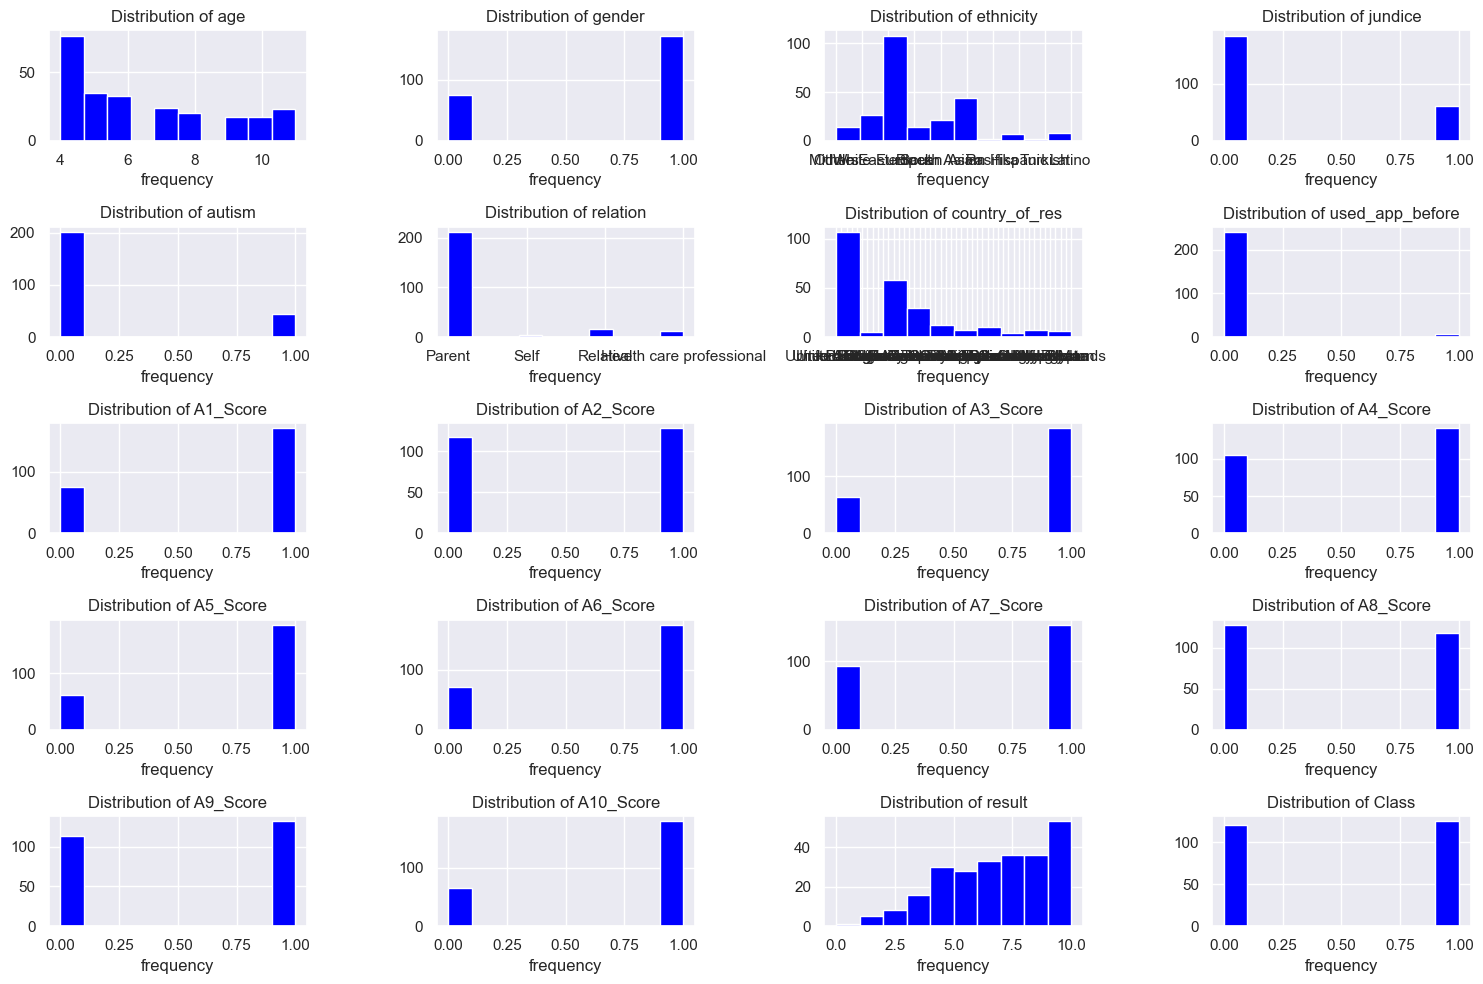

In [21]:
features = data.columns
# Create subplots in a 5x4 grid
fig, axes = plt.subplots(5,4 , figsize=(15, 10))
axes = axes.flatten()
# Iterate through unique regions and plot consumption data
for i, feature in enumerate(features):
    if i < 20:
        ax = axes[i]
        ax.hist(data[feature],label=feature, color='blue')
        ax.set_xlabel('frequency')
        ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

**Observations:**
1. We can see that the age, ethnicity, country_of_res and result features are skewed and so we might have to transform them based off results from further investigation.
2. The Class distribution is fairly proportional and as such we shall consider it balanced

In [22]:
# onehot enconding the remaining object dtype variables
data = pd.get_dummies(data, drop_first=False)

In [23]:
data

,age,gender,jundice,autism,used_app_before,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,...,country_of_res_Saudi Arabia,country_of_res_South Africa,country_of_res_South Korea,country_of_res_Sweden,country_of_res_Syria,country_of_res_Turkey,country_of_res_U.S. Outlying Islands,country_of_res_United Arab Emirates,country_of_res_United Kingdom,country_of_res_United States
0,6,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
6,5,1,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
7,5,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,7,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
288,7,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
289,4,1,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
290,4,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# #investigating the correlation between the question features and the result variable
# questions = data[['A1_Score','A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score',
#        'A8_Score', 'A9_Score', 'A10_Score', 'result']]
# correlation_matrix = questions.corr()

In [25]:
# #plotting the correlation matrix on a heatmap
# plt.subplots(figsize=(15,10))
# sns.heatmap(correlation_matrix, annot=True).set(title="A heatmap showing feature correlation with the dependent variable");

In [26]:
# **Observation:** We can see that features A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score,
#        A8_Score, A9_Score, and A10_Score are on average strongly correlated with the result. This is most likely a sign of multicollinearity and so we shall drop the result feature.

In [27]:
# #dropping the 'result' feature
# data.drop('result', inplace=True, axis=1)

In [28]:
#Attribute selection
X = data.drop('Class', axis=1)
y = data['Class']

In [29]:
#conducting feature selection using forward stepwise regression
#function sourced from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

forward_regression(X,y,0.05)

['result',
 'ethnicity_Hispanic',
 'A6_Score',
 'A4_Score',
 'A10_Score',
 'country_of_res_Bahrain']

In [30]:
inner_cv = KFold(n_splits=5, shuffle=True) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True) # outer cross-validation folds

In [31]:
#Decision tree classifier
# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_samples_split':[2,3,4,5]
                            }
                             ],
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt2 = gs_dt2.fit(X,y)
print("\nParameter tunning and model evaluation using nested cross-validation for the Decision Tree classifier")
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())


Parameter tunning and model evaluation using nested cross-validation for the Decision Tree classifier
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(max_depth=1, random_state=42)
Nested CV Recall:  1.0  +/-  0.0


In [32]:
# Choosing C parameter for Logistic Regression AND type of penalty (ie., l1 vs l2)
# See other parameters here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='recall',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X,y)
print("\nParameter tunning and model evaluation using nested cross-validation for Logistic Regression")
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X, y=y, cv=outer_cv)
print("Nested CV Recall:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())


Parameter tunning and model evaluation using nested cross-validation for Logistic Regression
Optimal Parameter:  {'C': 10, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')
Nested CV Recall: 1.0  +/-  0.0


In [33]:
#Normalize Data
np.random.seed(42)
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(p=2,
                                     metric='minkowski'))])

#Parameters to optimize:  k for number of nearest neighbors AND type of distance

params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance']
    }

gs_knn2 = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn2 = gs_knn2.fit(X,y)
print("\nParameter tunning and model evaluation using nested cross-validation for KNN")
print("Optimal Score: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


Parameter tunning and model evaluation using nested cross-validation for KNN
Optimal Score:  0.9533333333333334
Optimal Parameter:  {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])
Nested CV Recall:  0.9597837347837348  +/-  0.024512807875320976


In [34]:
#Random Forest classifier
# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt2 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  param_grid=[{'n_estimators': [100,500,1000],
                               'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_split':[2,3,4,5]
                              }
                             ],
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt2 = gs_dt2.fit(X,y)
print("\nParameter tunning and model evaluation using nested cross-validation for the Random Forest classifier")
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())


Parameter tunning and model evaluation using nested cross-validation for the Random Forest classifier
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 500}
Optimal Estimator:  RandomForestClassifier(max_depth=1, n_estimators=500, random_state=42)
Nested CV Recall:  1.0  +/-  0.0


### Model evaluation for models with best parameters

In [35]:
#function to visualize the confusion mattrix
def plot_confusion_matrix(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(3, 2))
    sns.set(font_scale=1.2)  # Adjust the font scale for readability
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


#function to evaluate the classifier
def evaluate_classifier(y_true, y_pred):
    # Calculate and print classification report
    report = classification_report(y_true, y_pred)
    print("Classification Report:\n", report)

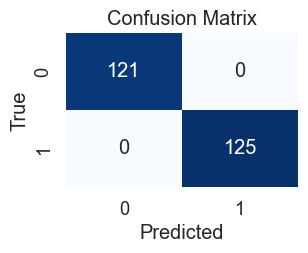

In [36]:
#Decision tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
#decision_tree.fit(X,y, c)
predicted_labels = cross_val_predict(decision_tree, X, y, cv=10)
# Plot the confusion matrix using Seaborn
plot_confusion_matrix(y, predicted_labels)

In [37]:
evaluate_classifier(y, predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       125

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



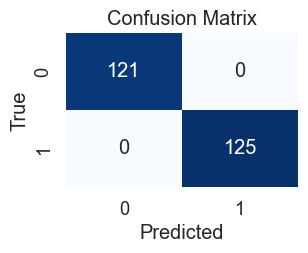

In [38]:
#Logistic Regression classifier
LR = LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')
predicted_labels = cross_val_predict(LR, X, y, cv=10)
# Plot the confusion matrix using Seaborn
plot_confusion_matrix(y, predicted_labels)

In [39]:
evaluate_classifier(y, predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       125

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



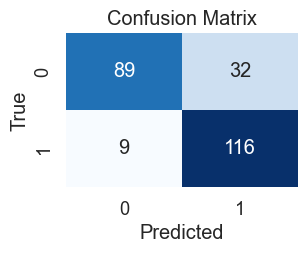

In [40]:
knn = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=9,
                                     metric='minkowski'))
      ])
predicted_labels = cross_val_predict(knn, X, y, cv=10)
# Plot the confusion matrix using Seaborn
plot_confusion_matrix(y, predicted_labels)

In [41]:
evaluate_classifier(y, predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81       121
           1       0.78      0.93      0.85       125

    accuracy                           0.83       246
   macro avg       0.85      0.83      0.83       246
weighted avg       0.84      0.83      0.83       246



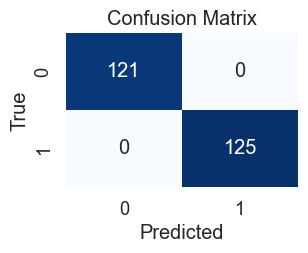

In [42]:
RF = RandomForestClassifier(max_depth=1, n_estimators=500, random_state=42)
predicted_labels = cross_val_predict(RF, X, y, cv=10)
# Plot the confusion matrix using Seaborn
plot_confusion_matrix(y, predicted_labels)

In [43]:
evaluate_classifier(y, predicted_labels)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       125

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



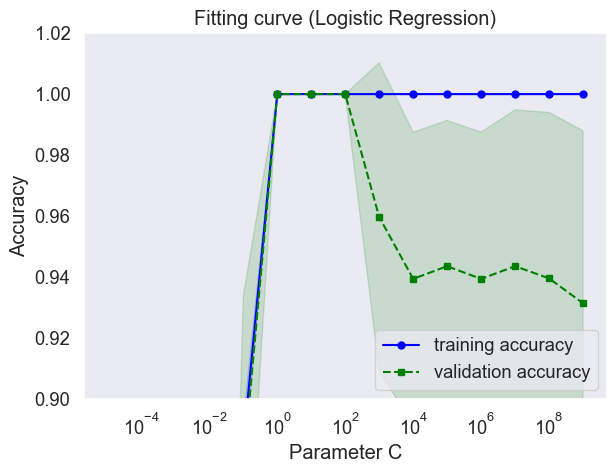

In [44]:


############################# Parameters - Varying Complexity #############################

# Specify possible parameter values for C.
# Parameter C: Inverse of regularization strength;
# C must be a positive float; smaller values specify stronger regularization.
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

# Compute scores for an estimator with different values of a specified parameter.
# This is similar to grid search with one parameter.
# However, this will also compute training scores and is merely a utility for plotting the results.

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
# sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
train_scores, test_scores = validation_curve(
                estimator=LogisticRegression( penalty='l1', random_state=42, solver='liblinear'), # build Logistic Regression models
                X=X,                                    # data (features)
                y=y,                                    # target variable
                param_name="C",                               # parameter C: Inverse of regularization strength;
                                                              # must be a positive float. Smaller values of paramter C specify
                                                              # stronger regularization.
                param_range=param_range,                      # the values of the parameter that will be evaluated

                cv=10,                                        # 10-fold cross-validation
                scoring="accuracy",                           # evaluation metric
                n_jobs=4)         # number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
                                  # this parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of
                                  # whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training accuracy')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,
         test_mean,
         color='green',
         linestyle='--',
         marker='s',
         markersize=5,
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.02]) # y limits in the plot
plt.tight_layout()
plt.title('Fitting curve (Logistic Regression)')
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()                            # display the figure



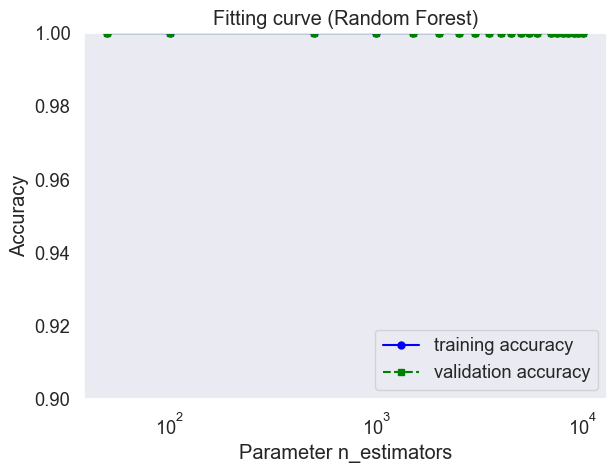

In [45]:


############################# Parameters - Varying Complexity #############################


param_range = [50,100,500,1000, 1500, 2000, 2500, 3000, 3500,4000,4500,5000,5500,6000,7000,7500,8000,8500,9000,9500,10000]

# Compute scores for an estimator with different values of a specified parameter.
# This is similar to grid search with one parameter.
# However, this will also compute training scores and is merely a utility for plotting the results.

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
# sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
train_scores, test_scores = validation_curve(
                estimator=RandomForestClassifier(n_estimators=500, random_state=42), # build Logistic Regression models
                X=X,                                    # data (features)
                y=y,                                    # target variable
                param_name="n_estimators",


                param_range=param_range,                      # the values of the parameter that will be evaluated

                cv=10,                                        # 10-fold cross-validation
                scoring="accuracy",                           # evaluation metric
                n_jobs=4)         # number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
                                  # this parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of
                                  # whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training accuracy')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,
         test_mean,
         color='green',
         linestyle='--',
         marker='s',
         markersize=5,
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_estimators')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0]) # y limits in the plot
plt.tight_layout()
plt.title('Fitting curve (Random Forest)')
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()                            # display the figure



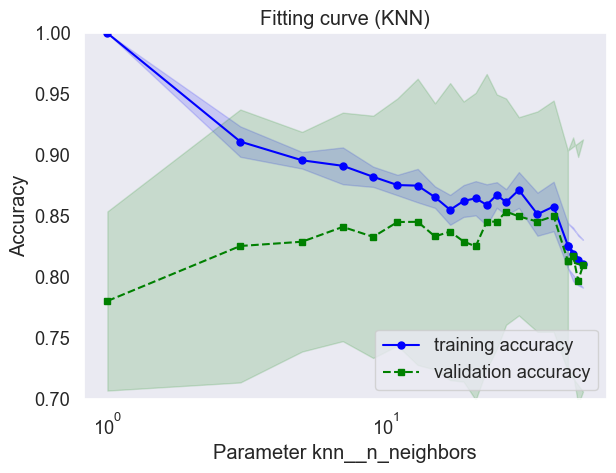

In [46]:


############################# Parameters - Varying Complexity #############################


param_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,30,35,40,45,47,49,51,45]
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(p=2,
                                     metric='minkowski'))
      ])

# Compute scores for an estimator with different values of a specified parameter.
# This is similar to grid search with one parameter.
# However, this will also compute training scores and is merely a utility for plotting the results.

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
# sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
train_scores, test_scores = validation_curve(
                estimator=pipe, # build Logistic Regression models
                X=X,                                    # data (features)
                y=y,                                    # target variable
                param_name="knn__n_neighbors",

                param_range=param_range,                      # the values of the parameter that will be evaluated

                cv=10,                                        # 10-fold cross-validation
                scoring="accuracy",                           # evaluation metric
                n_jobs=4)         # number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
                                  # this parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of
                                  # whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training accuracy')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,
         test_mean,
         color='green',
         linestyle='--',
         marker='s',
         markersize=5,
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter knn__n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0]) # y limits in the plot
plt.tight_layout()
plt.title('Fitting curve (KNN)')
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()                            # display the figure



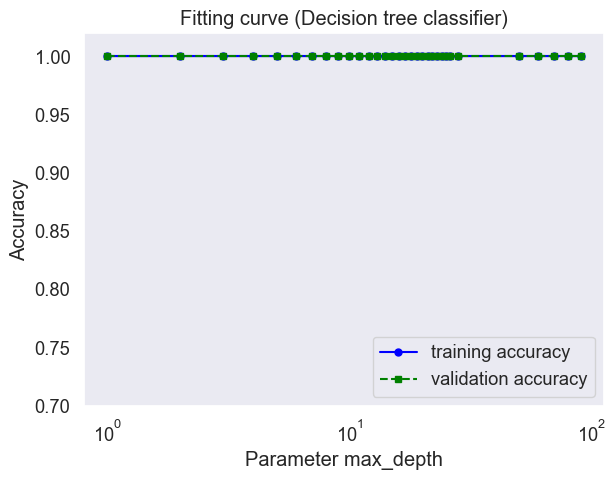

In [47]:
                      # the seed used by the random number generator for np

############################# Parameters - Varying Complexity #############################


param_range = [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,50,60,70,80,90]

# Compute scores for an estimator with different values of a specified parameter.
# This is similar to grid search with one parameter.
# However, this will also compute training scores and is merely a utility for plotting the results.

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
# sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
train_scores, test_scores = validation_curve(
                estimator=DecisionTreeClassifier(criterion='entropy', random_state=42), # build Logistic Regression models
                X=X,                                    # data (features)
                y=y,                                    # target variable
                param_name="max_depth",


                param_range=param_range,                      # the values of the parameter that will be evaluated

                cv=10,                                        # 10-fold cross-validation
                scoring="accuracy",                           # evaluation metric
                n_jobs=4)         # number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
                                  # this parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of
                                  # whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training accuracy')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,
         test_mean,
         color='green',
         linestyle='--',
         marker='s',
         markersize=5,
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.02]) # y limits in the plot
plt.tight_layout()
plt.title('Fitting curve (Decision tree classifier)')
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()                            # display the figure



In [48]:


############################## Function for Learning Curves ##############################

def plot_learning_curve(estimator,        # data science algorithm
                        title,            # title of the plot
                        X, y,             # data (features and target variable)
                        ylim=None,        # minimum and maximum y values plotted
                        cv=None,          # cross validation splits
                        n_jobs=1,         # parallell estimation using multiple processors
                        train_sizes=np.linspace(.1, 1.0, 5)): #linspace returns evenly spaced numbers over a specified interval (start, stop, num)


    # Initialization of Figure
    plt.figure()                    # display figure

    # Titles/labels for the plot are set
    plt.title(title)                # specify title based on parameter provided as input
    if ylim is not None:            # if ylim was specified as an input, make sure the plots use these limits
        plt.ylim(*ylim)
    plt.xlabel("Training examples") # y label title
    plt.ylabel("Score")             # x label title

    # Learning Curve Calculation
    # This helps to understand how the model's performance varies as more data is used for training.
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    # Detailed documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
    # train_sizes = numbers of training examples that has been used to generate the learning curve
    # train_scores = scores on training sets (array)
    # test_scores = scores on test set (array)
    train_sizes, train_scores, test_scores = learning_curve(estimator, # data science algorithm
                                                            X, y,      # data (features and target variable)
                                                            cv=cv,     # cross-validation folds
                                                            n_jobs=n_jobs, # number of jobs to run in parallel using multiple processors
                                                            train_sizes=train_sizes) # relative or absolute numbers of training examples
                                                                                     # that will be used to generate the learning curve

    # Score Calculations
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis.

    # Visualization of Learning Curve
    plt.grid()                                        # configure the grid lines in the plot
                                                      # adds grid lines to the plot for better visualization and understanding of the data points

    # Fill Between Scores to Indicate Standard Deviation
    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    # The area filled represents one standard deviation above and below the mean of the training/test scores
    plt.fill_between(train_sizes,                            # the x coordinates of the nodes defining the curves
                     train_scores_mean - train_scores_std,   # the y coordinates of the nodes defining the first curve
                     train_scores_mean + train_scores_std,   # the y coordinates of the nodes defining the second curve
                     alpha=0.1,                              # level of transparency in the color fill
                     color="r")                              # train data performance indicated with red
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")                              # test data performance indicated with green

    # Plotting the Mean Scores
    # Cross-validation mean scores indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes,                                    # the horizontal coordinates of the data points
             train_scores_mean,                              # the vertical coordinates of the data points
             'o-',                                           # o- will produce a small circle and a solid line to connect the markers
             color="r",                                      # line of red color
             label="Training score")                         # specify label title for this plot

    # Test data performance indicated with green
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",                                      # line of green color
             label="Cross-validation score")

    plt.legend(loc="best")                      # show legend of the plot at the best location possible
                                                # placing it in the "best" location based on where matplotlib thinks it will least overlap with other elements
    return plt                                  # function that returns the plot as an output

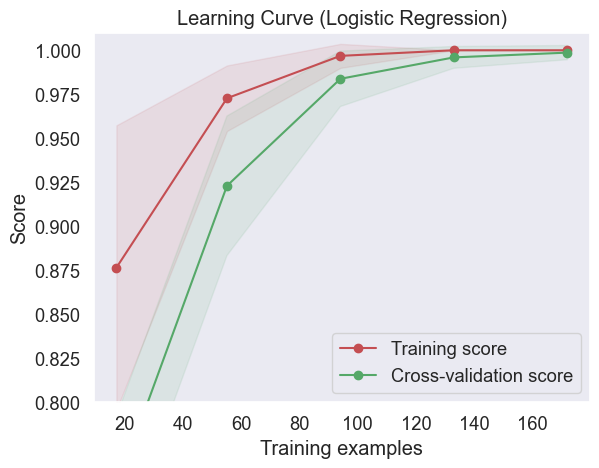

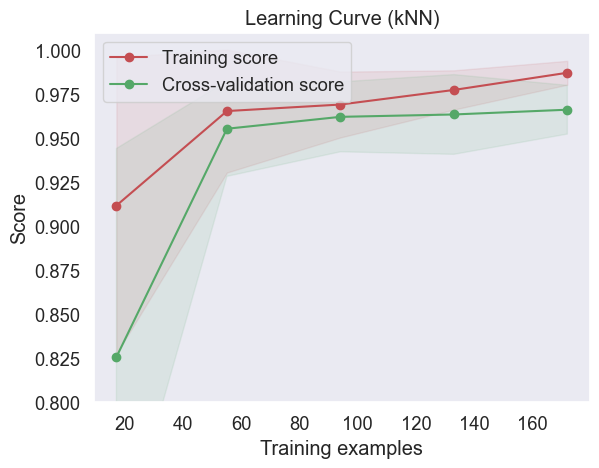

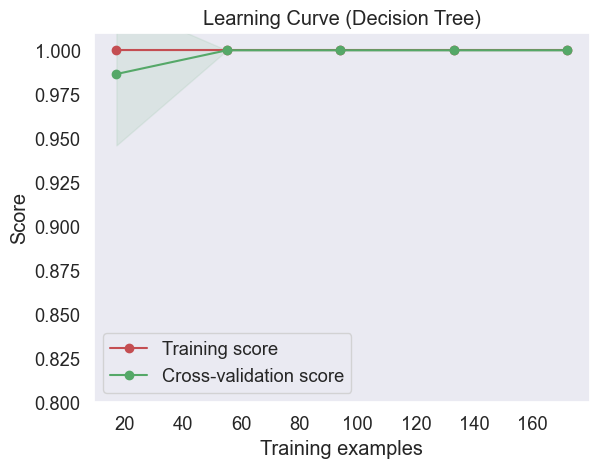

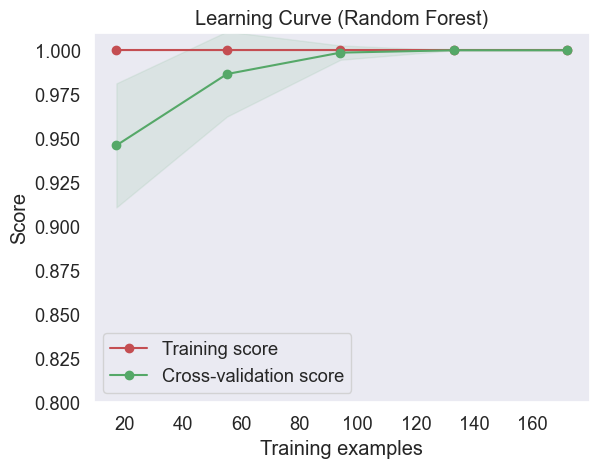

In [49]:


# Defines the title for the learning curve of the Logistic Regression
title = "Learning Curve (Logistic Regression)"

# Initializes the ShuffleSplit cross-validator & an instance of the logistic regression model
# Class ShuffleSplit is a random permutation cross-validator
cv = ShuffleSplit(n_splits=10,          # number of re-shuffling & splitting iterations
                  test_size=0.3,        # represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0)
                  random_state=42)      # the seed used by the random number generator
estimator = LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')        # build multiple LR models as we increase the size of the traning data

# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator,      # data science algorithm
                    title,          # title of the plot
                    X, y,           # data (features and target variable)
                    (0.8, 1.01),    # minimum and maximum y values plotted
                    cv=cv,          # cross-validation folds (produced above)
                    n_jobs=4)       # parallell estimation using multiple processors (ie., 4 cores here)

plt.show()                          # display the figure

title = "Learning Curve (kNN)"

# Plots the learning curve based on the previously defined function for the kNN classifier. Uses the
# random permutation cross-validator
cv = ShuffleSplit(n_splits=10,
                  test_size=0.3,
                  random_state=42)
estimator = neighbors.KNeighborsClassifier(n_neighbors=9,
                                     metric='minkowski')  # build multiple kNN models as we increase the size of the traning data
                                              # n_neighbors=5 by default
plot_learning_curve(estimator,
                    title,
                    X, y,
                    (0.8, 1.01),              # minimum and maximum y values plotted
                    cv=cv,
                    n_jobs=4)

plt.show()                          #display the figure


title = "Learning Curve (Decision Tree)"

# Plots the learning curve based on the previously defined function for Decision Tree. Uses the
# random permutation cross-validator
cv = ShuffleSplit(n_splits=10,
                  test_size=0.3,
                  random_state=42)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
plot_learning_curve(estimator,
                    title,
                    X, y,
                    (0.8, 1.01),              # minimum and maximum y values plotted
                    cv=cv,
                    n_jobs=4)

plt.show()                          #display the figure

title = "Learning Curve (Random Forest)"

# Plots the learning curve based on the previously defined function for random forest. Uses the
# random permutation cross-validator
cv = ShuffleSplit(n_splits=10,
                  test_size=0.3,
                  random_state=42)
estimator = RandomForestClassifier()
plot_learning_curve(estimator,
                    title,
                    X, y,
                    (0.8, 1.01),              # minimum and maximum y values plotted
                    cv=cv,
                    n_jobs=4)

plt.show()                          #display the figure


In [50]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

10-fold cross validation:

ROC AUC: 1.00 (+/- 0.00) [Logistic regression]
ROC AUC: 1.00 (+/- 0.00) [Decision tree]
ROC AUC: 0.93 (+/- 0.08) [kNN]


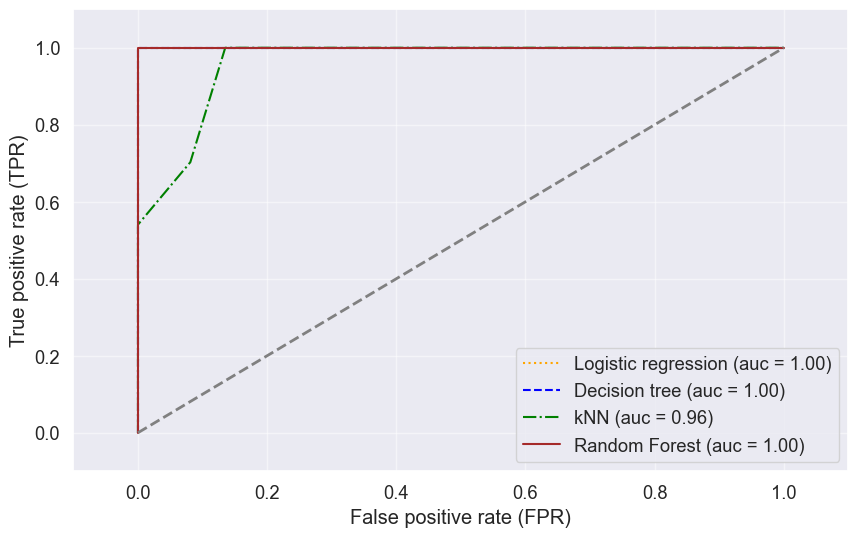

In [51]:
# Logistic Regression Classifier
clf1 = LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# kNN Classifier

clf3 = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=9,
                                     metric='minkowski'))
      ])
clf4 = RandomForestClassifier(max_depth=1, n_estimators=500, random_state=42)

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN', 'Random Forest']
all_clf = [clf1, clf2, clf3, clf4]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" # print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green','brown']      # colors for visualization
linestyles = [':', '--', '-.', '-', '*']        # line styles for visualization
plt.figure(figsize=(10, 6))
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers

    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC)
    
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend

plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()